In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf


In [2]:
dt=pd.read_csv('delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

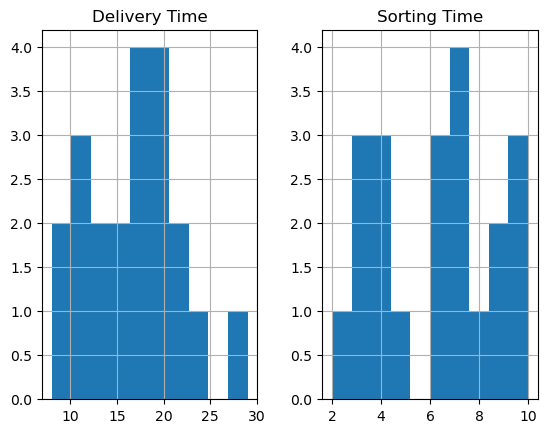

In [6]:
dt.hist()

In [7]:
dt=dt.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


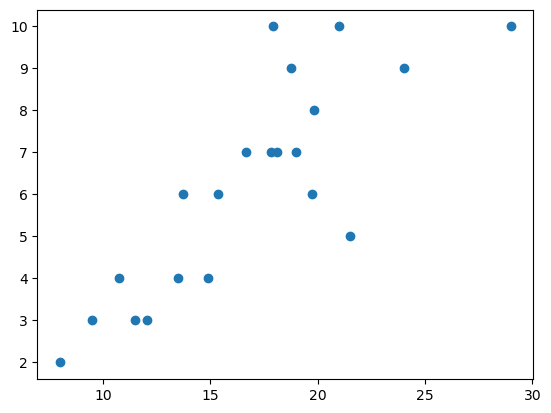

In [8]:
x = dt.delivery_time
y = dt.sorting_time
plt.scatter(x,y)
plt.xlabel=("delivery_time")
plt.ylabel=("sorting_time")

<AxesSubplot:>

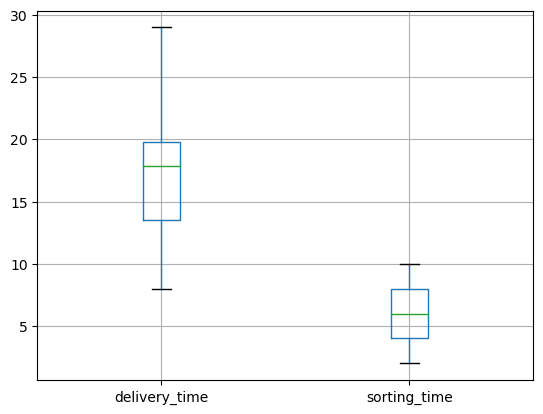

In [9]:
dt.boxplot()

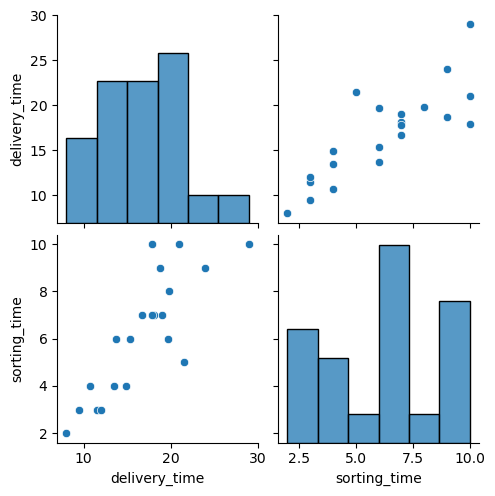

In [10]:
sns.pairplot(dt)

C:\Users\ROHIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

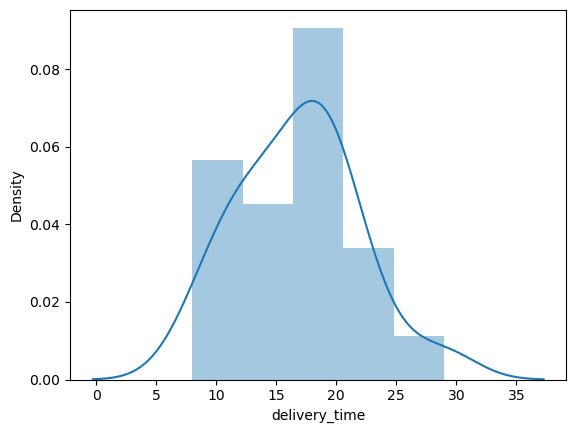

In [11]:
sns.distplot(dt['delivery_time'])

C:\Users\ROHIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

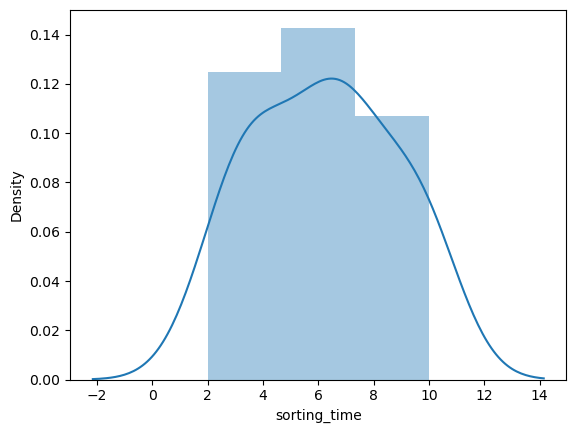

In [12]:
sns.distplot(dt['sorting_time'])

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

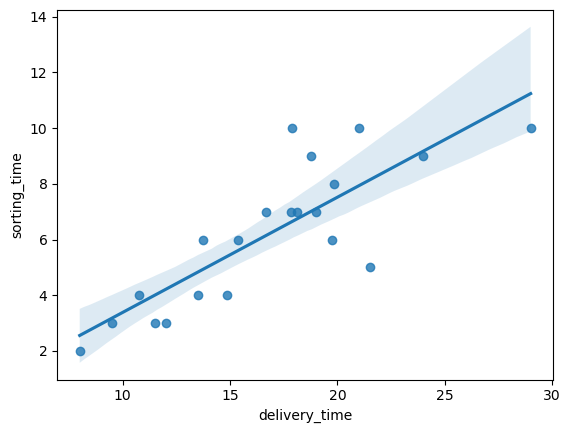

In [13]:
sns.regplot(x='delivery_time', y='sorting_time', data=dt)


In [14]:
model=smf.ols("sorting_time~delivery_time ", data=dt).fit()
model.summary() #build the models

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        08:21:26   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [16]:
print(model.tvalues,'\n' ,model.pvalues)

Intercept       -0.667290
delivery_time    6.387447
dtype: float64 
 Intercept        0.512611
delivery_time    0.000004
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417232, 0.6655489208860245)

In [18]:
model2 = smf.ols("np.log(sorting_time)~delivery_time", data=dt).fit() 
model2.params
model2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Mon, 20 Nov 2023   Prob (F-statistic):           2.64e-06
Time:                          08:21:31   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [20]:
model3 = smf.ols("np.sqrt(sorting_time)~delivery_time", data=dt).fit() 
model3.params
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(sorting_time)   R-squared:                       0.696
Model:                               OLS   Adj. R-squared:                  0.680
Method:                    Least Squares   F-statistic:                     43.46
Date:                   Mon, 20 Nov 2023   Prob (F-statistic):           2.61e-06
Time:                           08:21:33   Log-Likelihood:                -3.5906
No. Observations:                     21   AIC:                             11.18
Df Residuals:                         19   BIC:                             13.27
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9609      0.233      4.128      0.001       0.474       1.448
delivery_time     0.0877      0.013      6.592      0.000       0.060       0.116
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.114
Skew:                           0.099   Prob(JB):                        0.945
Kurtosis:                       2.698   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
(model3.rsquared,model3.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [22]:
newdata=pd.Series([10,5]) 

In [23]:
data_pred=pd.DataFrame(newdata, columns=['delivery_time'])
data_pred

,delivery_time
0,10
1,5


In [24]:
model3.predict(data_pred)

0    1.837641
1    1.399287
dtype: float64